In [76]:
import numpy as np
import matplotlib
from pylab import rcParams

# matplotlib.use('TkAgg')
from matplotlib import pyplot as plt
import json
import sys
import math as M
from scipy.interpolate import interp1d
from itertools import groupby
import seaborn as sns
import os
import glob

sns.set_style('ticks')


class Plotter(object):
    markers = ('+', 'x', 'v', 'o', '^', '<', '>', '8', 's', 'p', '*', 'h', 'H', 'D', 'd', 'P', 'X')
    color_list = ['b', 'r', 'g', 'c', 'm', 'y', 'k', 'cyan', 'plum', 'darkgreen', 'darkorange', 'oldlace', 'chocolate',
                  'purple', 'lightskyblue', 'gray', 'seagreen', 'antiquewhite',
                  'snow', 'darkviolet', 'brown', 'skyblue', 'mediumaquamarine', 'midnightblue', 'darkturquoise',
                  'sienna', 'lightsteelblue', 'gold', 'teal', 'blueviolet', 'mistyrose', 'seashell', 'goldenrod',
                  'forestgreen', 'aquamarine', 'linen', 'deeppink', 'darkslategray', 'mediumseagreen', 'dimgray',
                  'mediumpurple', 'lightgray', 'khaki', 'dodgerblue', 'papayawhip', 'salmon', 'floralwhite',
                  'lightpink', 'gainsboro', 'coral', 'indigo', 'darksalmon', 'royalblue', 'navy', 'orangered',
                  'cadetblue', 'orchid', 'palegreen', 'magenta', 'honeydew', 'darkgray', 'palegoldenrod', 'springgreen',
                  'lawngreen', 'palevioletred', 'olive', 'red', 'lime', 'yellowgreen', 'aliceblue', 'orange',
                  'chartreuse', 'lavender', 'paleturquoise', 'blue', 'azure', 'yellow', 'aqua', 'mediumspringgreen',
                  'cornsilk', 'lightblue', 'steelblue', 'violet', 'sandybrown', 'wheat', 'greenyellow', 'darkred',
                  'mediumslateblue', 'lightseagreen', 'darkblue', 'moccasin', 'lightyellow', 'turquoise', 'tan',
                  'mediumvioletred', 'mediumturquoise', 'limegreen', 'slategray', 'lightslategray', 'mintcream',
                  'darkgreen', 'white', 'mediumorchid', 'firebrick', 'bisque', 'darkcyan', 'ghostwhite', 'powderblue',
                  'tomato', 'lavenderblush', 'darkorchid', 'cornflowerblue', 'plum', 'ivory', 'darkgoldenrod', 'green',
                  'burlywood', 'hotpink', 'cyan', 'silver', 'peru', 'thistle', 'indianred', 'olivedrab',
                  'lightgoldenrodyellow', 'maroon', 'black', 'crimson', 'darkolivegreen', 'lightgreen', 'darkseagreen',
                  'lightcyan', 'saddlebrown', 'deepskyblue', 'slateblue', 'whitesmoke', 'pink', 'darkmagenta',
                  'darkkhaki', 'mediumblue', 'beige', 'blanchedalmond', 'lightsalmon', 'lemonchiffon', 'navajowhite',
                  'darkslateblue', 'lightcoral', 'rosybrown', 'fuchsia', 'peachpuff']

    def __init__(self, log_path):
        self.log_path = log_path
        self.color_list = Plotter.color_list

        self.markers = Plotter.markers

    def plot_fig(self, fig_num, col_id, x, y, title, x_lable, y_label, label=' ', marker= 5, save_path=None,
                 save_name='res'):
        rcParams['figure.figsize'] = 4, 3
        rcParams['figure.figsize'] = 8, 6
        sns.set_style("darkgrid")
        plt.figure(fig_num)
        plt.title(title)
        plt.xlabel(x_lable)
        plt.ylabel(y_label)
        #plt.ticklabel_format(style='sci', axis='x', scilimits=(0, 0))

        marker_every = max(int(len(x) / 10), 1)
        if len(np.array(y).shape) > 1:
            new_shape = np.array(y).shape
            print(new_shape)

            res = np.reshape(np.reshape(np.array([y]), newshape=[-1]), newshape=[new_shape[1], new_shape[0]],
                             order='F').tolist()
            res = list(res)
            for i in range(len(res)):
                res_i = res[i]
                #plt.subplot(len(res), 1, i + 1)
                #plt.title(title + '_' + str(i))
                ax, = plt.plot(x, res_i, self.color_list[col_id], label=str(label[i]), marker=self.markers[marker[i]],
                               markevery=marker_every, markersize=6, linewidth=1)
                col_id += 1
        else:
            ax, = plt.plot(x, y, self.color_list[col_id], label=label, marker=self.markers[marker[i]], markevery=marker_every,
                           markersize=6,
                           linewidth=1)
        if save_path:
            plt.savefig(save_path + save_name + '.pdf')
            plt.savefig(save_path + save_name + '.jpg')
            plt.savefig(save_path + save_name + '.png')
        else:
            plt.savefig(self.log_path + save_name + '.pdf')
            plt.savefig(self.log_path + save_name + '.jpg')
            plt.savefig(self.log_path + save_name + '.png')
        plt.legend()
        plt.show()




(5, 2)


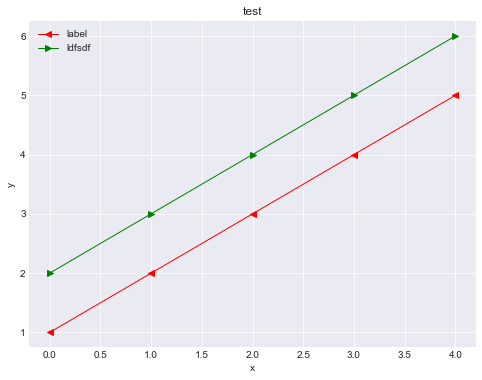

In [54]:
xx = range(5)
yy = [[1,2],[2,3],[3,4],[4,5],[5,6]]
p = Plotter(log_path='.')
p.plot_fig(fig_num=1,
           x=xx,
           y=yy,
           col_id=1,
           title='test',
           x_lable='x',
           y_label='y',
           label=['label','ldfsdf'],
           marker=[5,6],
           save_path='./',
           save_name='test')

(8, 3)


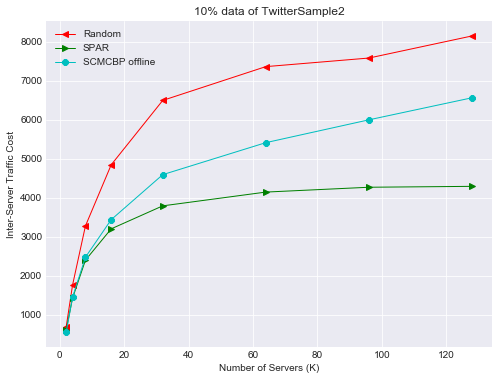

In [66]:
#Fig3 dataset=twitters2 vpc=0 nodes=10%
x = [2,4,8,16,32,64,96,128]
random = [678,1762,3277,4845,6495,7361,7581,8147]
random = np.reshape(random,(len(random),1))
spar=[602,1427,2400,3203,3792,4145,4269,4292]
spar = np.reshape(spar,(len(spar),1))
offline = [546,1451,2475,3438,4592,5412,5997,6562]
offline = np.reshape(offline,(len(offline),1))
y = np.hstack((random,spar,offline))
label = ['Random', 'SPAR', 'SCMCBP offline']
name = 'fig3_0.1'
title = '10% data of TwitterSample2'
xlabel = 'Number of Servers (K)'
ylabel = 'Inter-Server Traffic Cost'
p = Plotter(log_path='.')
p.plot_fig(fig_num=1,
           x=x,
           y=y,
           col_id=1,
           title= title,
           x_lable=xlabel,
           y_label=ylabel,
           label=label,
           marker=[5,6,7],
           save_path='./',
           save_name=name)

(7, 3)


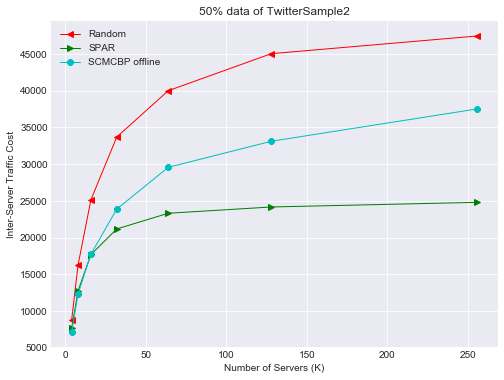

In [65]:
#Fig3 dataset=twitters2 vpc=0 nodes=50%
x = [4,8,16,32,64,128,256]
random = [8757,16283,25163,33692,40010,45053,47464]
random = np.reshape(random,(len(random),1))
spar=[7628,12760,17692,21180,23321,24175,24809]
spar = np.reshape(spar,(len(spar),1))
offline = [7086,12341,17756,23882,29574,33126,37535]
offline = np.reshape(offline,(len(offline),1))
y = np.hstack((random,spar,offline))
label = ['Random', 'SPAR', 'SCMCBP offline']
name = 'fig3_0.5'
title = '50% data of TwitterSample2'
xlabel = 'Number of Servers (K)'
ylabel = 'Inter-Server Traffic Cost'
p = Plotter(log_path='.')
p.plot_fig(fig_num=1,
           x=x,
           y=y,
           col_id=1,
           title= title,
           x_lable=xlabel,
           y_label=ylabel,
           label=label,
           marker=[5,6,7],
           save_path='./',
           save_name=name)

(4, 3)


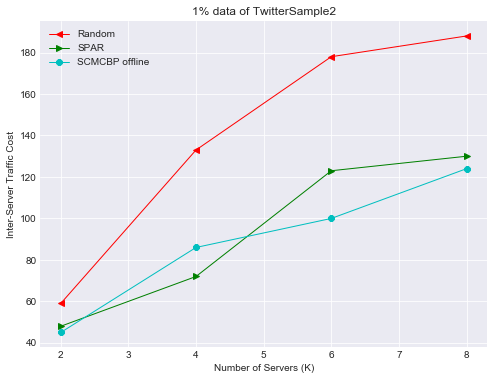

In [64]:
#Fig3 dataset=twitters2 vpc=0 nodes=1%
x = [2,4,6,8]
random = [59,133,178,188]
random = np.reshape(random,(len(random),1))
spar=[48,72,123,130]
spar = np.reshape(spar,(len(spar),1))
offline = [45,86,100,124]
offline = np.reshape(offline,(len(offline),1))
y = np.hstack((random,spar,offline))
label = ['Random', 'SPAR', 'SCMCBP offline']
name = 'fig3_0.01'
title = '1% data of TwitterSample2'
xlabel = 'Number of Servers (K)'
ylabel = 'Inter-Server Traffic Cost'
p = Plotter(log_path='.')
p.plot_fig(fig_num=1,
           x=x,
           y=y,
           col_id=1,
           title= title,
           x_lable=xlabel,
           y_label=ylabel,
           label=label,
           marker=[5,6,7],
           save_path='./',
           save_name=name)

(5, 3)


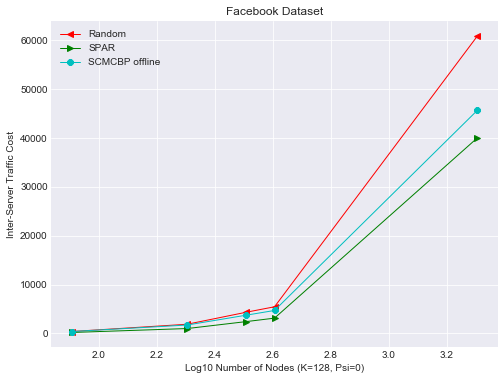

In [87]:
#Fig8 dataset=facebook vpc=0 ,k=128
x = np.log10(np.array([0.02,0.05,0.08,0.1,0.5])*4039)
random = [386,1876,4341,5453,60880]
random = np.reshape(random,(len(random),1))
spar=[193,997,2424,3128,40033]
spar = np.reshape(spar,(len(spar),1))
offline = [386,1718,3740,4698,45678]
offline = np.reshape(offline,(len(offline),1))
y = np.hstack((random,spar,offline))
label = ['Random', 'SPAR', 'SCMCBP offline']
name = 'fig8_128'
title = 'Facebook Dataset'
xlabel = 'Log10 Number of Nodes (K=128, Psi=0)'
ylabel = 'Inter-Server Traffic Cost'
p = Plotter(log_path='.')
p.plot_fig(fig_num=1,
           x=x,
           y=y,
           col_id=1,
           title= title,
           x_lable=xlabel,
           y_label=ylabel,
           label=label,
           marker=[5,6,7],
           save_path='./',
           save_name=name)

(5, 3)


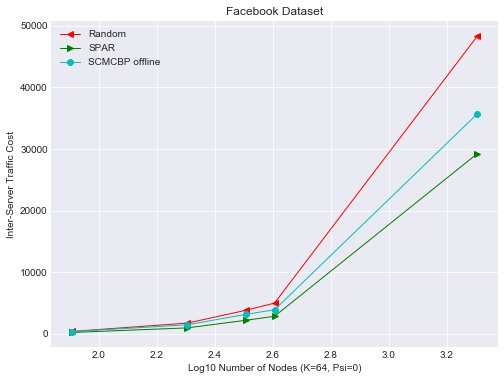

In [83]:
#Fig8 dataset=facebook vpc=0 , k=64
x = np.log10(np.array([0.02,0.05,0.08,0.1,0.5])*4039)
random = [357,1710,3811,4966,48353]
random = np.reshape(random,(len(random),1))
spar=[192,936,2185,2820,29261]
spar = np.reshape(spar,(len(spar),1))
offline = [338,1432,3154,3875,35722]
offline = np.reshape(offline,(len(offline),1))
y = np.hstack((random,spar,offline))
label = ['Random', 'SPAR', 'SCMCBP offline']
name = 'fig8_64'
title = 'Facebook Dataset'
xlabel = 'Log10 Number of Nodes (K=64, Psi=0)'
ylabel = 'Inter-Server Traffic Cost'
p = Plotter(log_path='.')
p.plot_fig(fig_num=1,
           x=x,
           y=y,
           col_id=1,
           title= title,
           x_lable=xlabel,
           y_label=ylabel,
           label=label,
           marker=[5,6,7],
           save_path='./',
           save_name=name)

(5, 3)


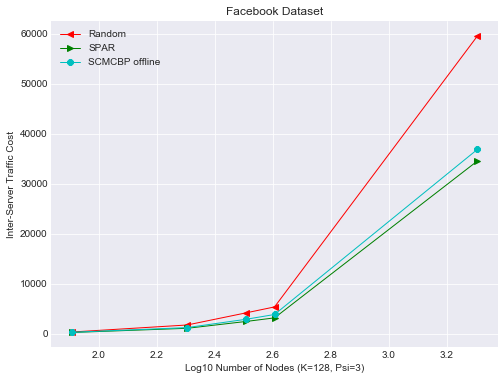

In [88]:
#Fig9 dataset=facebook vpc=0 ,k=128
x = np.log10(np.array([0.02,0.05,0.08,0.1,0.5])*4039)
random = [376,1783,4221,5390,59515]
random = np.reshape(random,(len(random),1))
spar=[288,1122,2496,3205,34548]
spar = np.reshape(spar,(len(spar),1))
offline = [320,1264,2934,3880,36865]
offline = np.reshape(offline,(len(offline),1))
y = np.hstack((random,spar,offline))
label = ['Random', 'SPAR', 'SCMCBP offline']
name = 'fig9_128'
title = 'Facebook Dataset'
xlabel = 'Log10 Number of Nodes (K=128, Psi=3)'
ylabel = 'Inter-Server Traffic Cost'
p = Plotter(log_path='.')
p.plot_fig(fig_num=1,
           x=x,
           y=y,
           col_id=1,
           title= title,
           x_lable=xlabel,
           y_label=ylabel,
           label=label,
           marker=[5,6,7],
           save_path='./',
           save_name=name)

(5, 3)


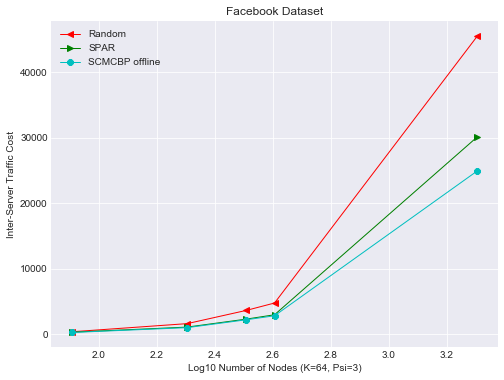

In [89]:
#Fig9 dataset=facebook vpc=0 ,k=64
x = np.log10(np.array([0.02,0.05,0.08,0.1,0.5])*4039)
random = [348,1594,3620,4743,45547]
random = np.reshape(random,(len(random),1))
spar=[283,1064,2285,2949,30149]
spar = np.reshape(spar,(len(spar),1))
offline = [243,982,2189,2794,24943]
offline = np.reshape(offline,(len(offline),1))
y = np.hstack((random,spar,offline))
label = ['Random', 'SPAR', 'SCMCBP offline']
name = 'fig9_64'
title = 'Facebook Dataset'
xlabel = 'Log10 Number of Nodes (K=64, Psi=3)'
ylabel = 'Inter-Server Traffic Cost'
p = Plotter(log_path='.')
p.plot_fig(fig_num=1,
           x=x,
           y=y,
           col_id=1,
           title= title,
           x_lable=xlabel,
           y_label=ylabel,
           label=label,
           marker=[5,6,7],
           save_path='./',
           save_name=name)

(8, 3)


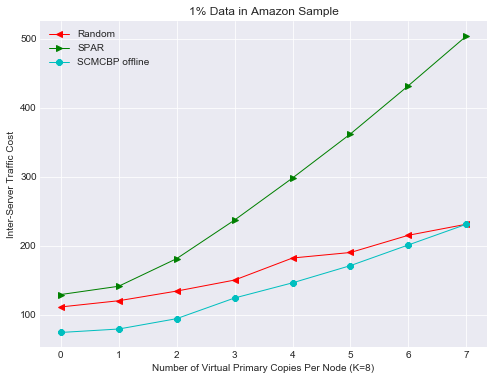

In [104]:
#Fig19 dataset=facebook vpc=0 ,data=0.01
x = range(8)
random = [111,120,134,150,182,190,215,231]
random = np.reshape(random,(len(random),1))
spar=[129,141,181,237,298,362,432,504]
spar = np.reshape(spar,(len(spar),1))
offline = [74,79,94,124,146,171,201,231]
offline = np.reshape(offline,(len(offline),1))
y = np.hstack((random,spar,offline))
label = ['Random', 'SPAR', 'SCMCBP offline']
name = 'fig19_0.01'
title = '1% Data in Amazon Sample'
xlabel = 'Number of Virtual Primary Copies Per Node (K=8)'
ylabel = 'Inter-Server Traffic Cost'
p = Plotter(log_path='.')
p.plot_fig(fig_num=1,
           x=x,
           y=y,
           col_id=1,
           title= title,
           x_lable=xlabel,
           y_label=ylabel,
           label=label,
           marker=[5,6,7],
           save_path='./',
           save_name=name)

(8, 3)


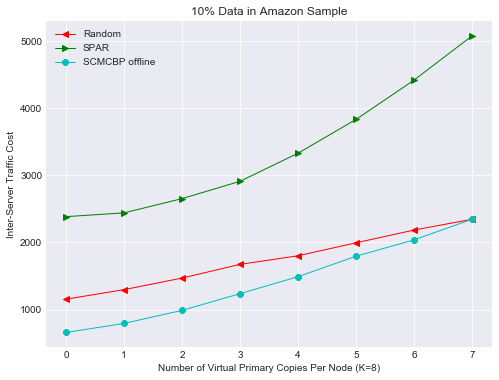

In [103]:
#Fig19 dataset=facebook vpc=0 ,data=0.1
x = range(8)
random = [1156,1298,1470,1674,1802,1995,2185,2345]
random = np.reshape(random,(len(random),1))
spar=[2385,2441,2653,2911,3329,3832,4417,5075]
spar = np.reshape(spar,(len(spar),1))
offline = [660,795,989,1238,1491,1795,2039,2345]
offline = np.reshape(offline,(len(offline),1))
y = np.hstack((random,spar,offline))
label = ['Random', 'SPAR', 'SCMCBP offline']
name = 'fig19_0.1'
title = '10% Data in Amazon Sample'
xlabel = 'Number of Virtual Primary Copies Per Node (K=8)'
ylabel = 'Inter-Server Traffic Cost'
p = Plotter(log_path='.')
p.plot_fig(fig_num=1,
           x=x,
           y=y,
           col_id=1,
           title= title,
           x_lable=xlabel,
           y_label=ylabel,
           label=label,
           marker=[5,6,7],
           save_path='./',
           save_name=name)

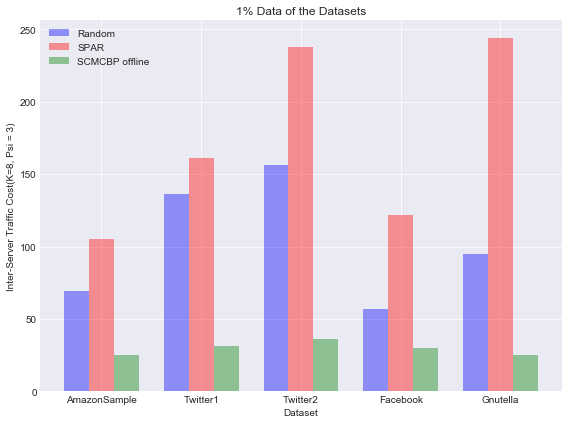

<Figure size 576x432 with 0 Axes>

In [99]:
# Fig 11 8 server 0.01

n_groups = 5
save_path='./'
save_name = 'Fig11_8_0.01'
random = (69,136,156,57,95)
spar=(105,161,238,122,244)
offline = (25,31,36,30,25)


fig, ax = plt.subplots()

index = np.arange(n_groups)
bar_width = 0.25

opacity = 0.4
#error_config = {'ecolor': '0.3'}

rects1 = ax.bar(index, random, bar_width,
                alpha=opacity, color='b',
                label='Random')

rects2 = ax.bar(index + bar_width, spar, bar_width,
                alpha=opacity, color='r',
                label='SPAR')



rects3 = ax.bar(index + bar_width*2, offline, bar_width,
                alpha=opacity, color='g',
                label='SCMCBP offline')

ax.set_xlabel('Dataset')
ax.set_ylabel('Inter-Server Traffic Cost(K=8, Psi = 3)')
ax.set_title('1% Data of the Datasets')
ax.set_xticks(index + bar_width)
ax.set_xticklabels(('AmazonSample', 'Twitter1', 'Twitter2', 'Facebook', 'Gnutella'))
ax.legend()

fig.tight_layout()
plt.show()
plt.savefig(save_path + save_name + '.pdf')
plt.savefig(save_path + save_name + '.jpg')
plt.savefig(save_path + save_name + '.png')

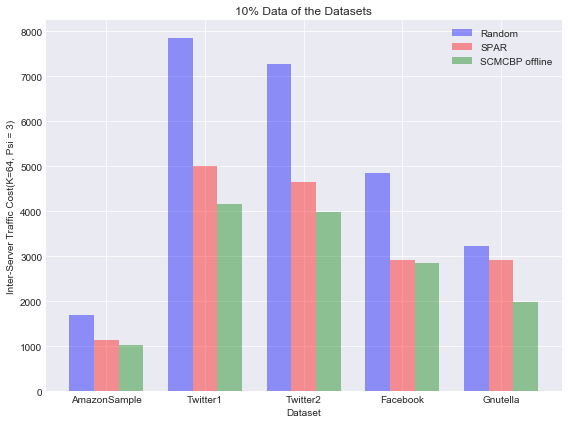

<Figure size 576x432 with 0 Axes>

In [100]:
# Fig 11 64 server 0.1

n_groups = 5
save_path='./'
save_name = 'Fig11_64_0.1'
random = (1706,7851,7274,4848,3231)
spar=(1140,4997,4656,2908,2912)
offline = (1029,4168,3993,2856,1988)


fig, ax = plt.subplots()

index = np.arange(n_groups)
bar_width = 0.25

opacity = 0.4
#error_config = {'ecolor': '0.3'}

rects1 = ax.bar(index, random, bar_width,
                alpha=opacity, color='b',
                label='Random')

rects2 = ax.bar(index + bar_width, spar, bar_width,
                alpha=opacity, color='r',
                label='SPAR')



rects3 = ax.bar(index + bar_width*2, offline, bar_width,
                alpha=opacity, color='g',
                label='SCMCBP offline')

ax.set_xlabel('Dataset')
ax.set_ylabel('Inter-Server Traffic Cost(K=64, Psi = 3)')
ax.set_title('10% Data of the Datasets')
ax.set_xticks(index + bar_width)
ax.set_xticklabels(('AmazonSample', 'Twitter1', 'Twitter2', 'Facebook', 'Gnutella'))
ax.legend()

fig.tight_layout()
plt.show()
plt.savefig(save_path + save_name + '.pdf')
plt.savefig(save_path + save_name + '.jpg')
plt.savefig(save_path + save_name + '.png')

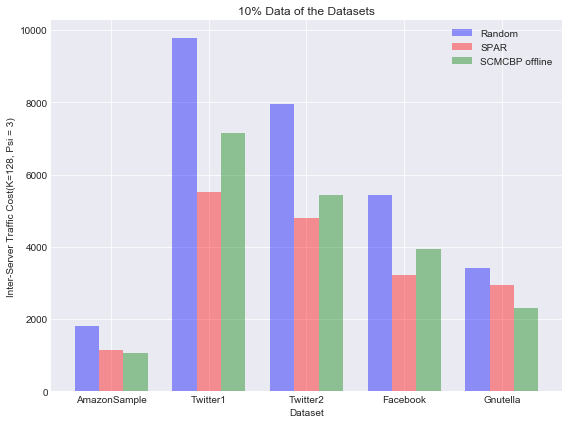

<Figure size 576x432 with 0 Axes>

In [101]:
# Fig 11 128 server 0.1

n_groups = 5
save_path='./'
save_name = 'Fig11_128_0.1'
random = (1803,9780,7959,5439,3410)
spar=(1151,5508,4802,3219,2942)
offline = (1069,7161,5438,3937,2297)


fig, ax = plt.subplots()

index = np.arange(n_groups)
bar_width = 0.25

opacity = 0.4
#error_config = {'ecolor': '0.3'}

rects1 = ax.bar(index, random, bar_width,
                alpha=opacity, color='b',
                label='Random')

rects2 = ax.bar(index + bar_width, spar, bar_width,
                alpha=opacity, color='r',
                label='SPAR')



rects3 = ax.bar(index + bar_width*2, offline, bar_width,
                alpha=opacity, color='g',
                label='SCMCBP offline')

ax.set_xlabel('Dataset')
ax.set_ylabel('Inter-Server Traffic Cost(K=128, Psi = 3)')
ax.set_title('10% Data of the Datasets')
ax.set_xticks(index + bar_width)
ax.set_xticklabels(('AmazonSample', 'Twitter1', 'Twitter2', 'Facebook', 'Gnutella'))
ax.legend()

fig.tight_layout()
plt.show()
plt.savefig(save_path + save_name + '.pdf')
plt.savefig(save_path + save_name + '.jpg')
plt.savefig(save_path + save_name + '.png')

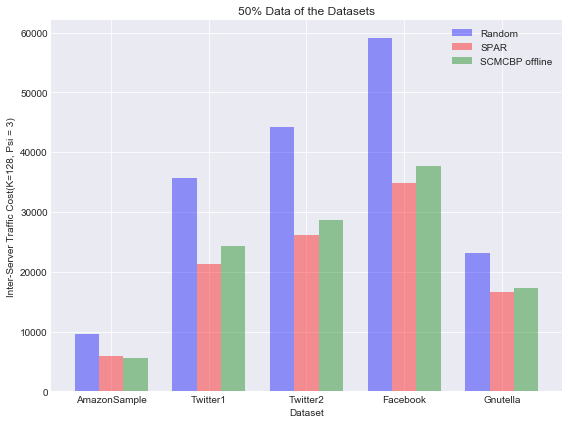

<Figure size 576x432 with 0 Axes>

In [102]:
# Fig 11 128 server 0.5

n_groups = 5
save_path='./'
save_name = 'Fig11_128_0.5'
random = (9529,35690,44183,59078,23207)
spar=(5962,21305,26169,34903,16560)
offline = (5635,24237,28655,37598,17290)


fig, ax = plt.subplots()

index = np.arange(n_groups)
bar_width = 0.25

opacity = 0.4
#error_config = {'ecolor': '0.3'}

rects1 = ax.bar(index, random, bar_width,
                alpha=opacity, color='b',
                label='Random')

rects2 = ax.bar(index + bar_width, spar, bar_width,
                alpha=opacity, color='r',
                label='SPAR')



rects3 = ax.bar(index + bar_width*2, offline, bar_width,
                alpha=opacity, color='g',
                label='SCMCBP offline')

ax.set_xlabel('Dataset')
ax.set_ylabel('Inter-Server Traffic Cost(K=128, Psi = 3)')
ax.set_title('50% Data of the Datasets')
ax.set_xticks(index + bar_width)
ax.set_xticklabels(('AmazonSample', 'Twitter1', 'Twitter2', 'Facebook', 'Gnutella'))
ax.legend()

fig.tight_layout()
plt.show()
plt.savefig(save_path + save_name + '.pdf')
plt.savefig(save_path + save_name + '.jpg')
plt.savefig(save_path + save_name + '.png')